**Metodo de composición**


**Función de Densidad de Probabilidad (PDF)**

La función de densidad de probabilidad (PDF) está definida a trozos de la siguiente manera:

$$
f(x) = \begin{cases}
\frac{3}{2} x^2 & \text{si } 0 \leq x \leq 1 \\
0 & \text{en otro caso}
\end{cases}
$$

$$
f(x) = \begin{cases}
\frac{3}{2} x^2 & \text{si } -1 \leq x < 0 \\
0 & \text{en otro caso}
\end{cases}
$$

**Función de Distribución Acumulativa (CDF)**


La función de distribución acumulativa (CDF) correspondiente se define como:

$$
F(x) = \begin{cases}
\frac{x^3}{2} & \text{si } 0 \leq x \leq 1 \\
1 - \frac{|x|^3}{2} & \text{si } -1 \leq x < 0 \\
0 & \text{si } x < -1 \\
1 & \text{si } x > 1
\end{cases}
$$

**Método de Composición**

Para generar una muestra de la distribución utilizando el método de composición, seguimos estos pasos:

1. Generamos dos números aleatorios \( U \) y \( V \) uniformemente distribuidos en el intervalo \([0, 1]\).
2.Si $( V < 0.5 )$, generamos $( X )$ usando $( f_1(x) )$ en el intervalo $[0, 1]$:

$$
 X = (2U)^{\frac{1}{3}}
$$

3. Si $( V \geq 0.5 )$, generamos $( X )$ usando $( f_2(x) )$ en el intervalo $[-1, 0]$:
$$
X = -((2U)^{\frac{1}{3}})
$$


Estadísticas de la Muestra

Con la muestra generada, podemos calcular las siguientes estadísticas:


Media $(\mu)$:

$$
\mu = \frac{1}{n} \sum_{i=1}^{n} X_i
$$   

Varianza$(\sigma^2)$:

$$
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (X_i - \mu)^2
$$
    
Mediana (m\):
    
La mediana es el valor que divide la muestra ordenada en dos partes iguales.



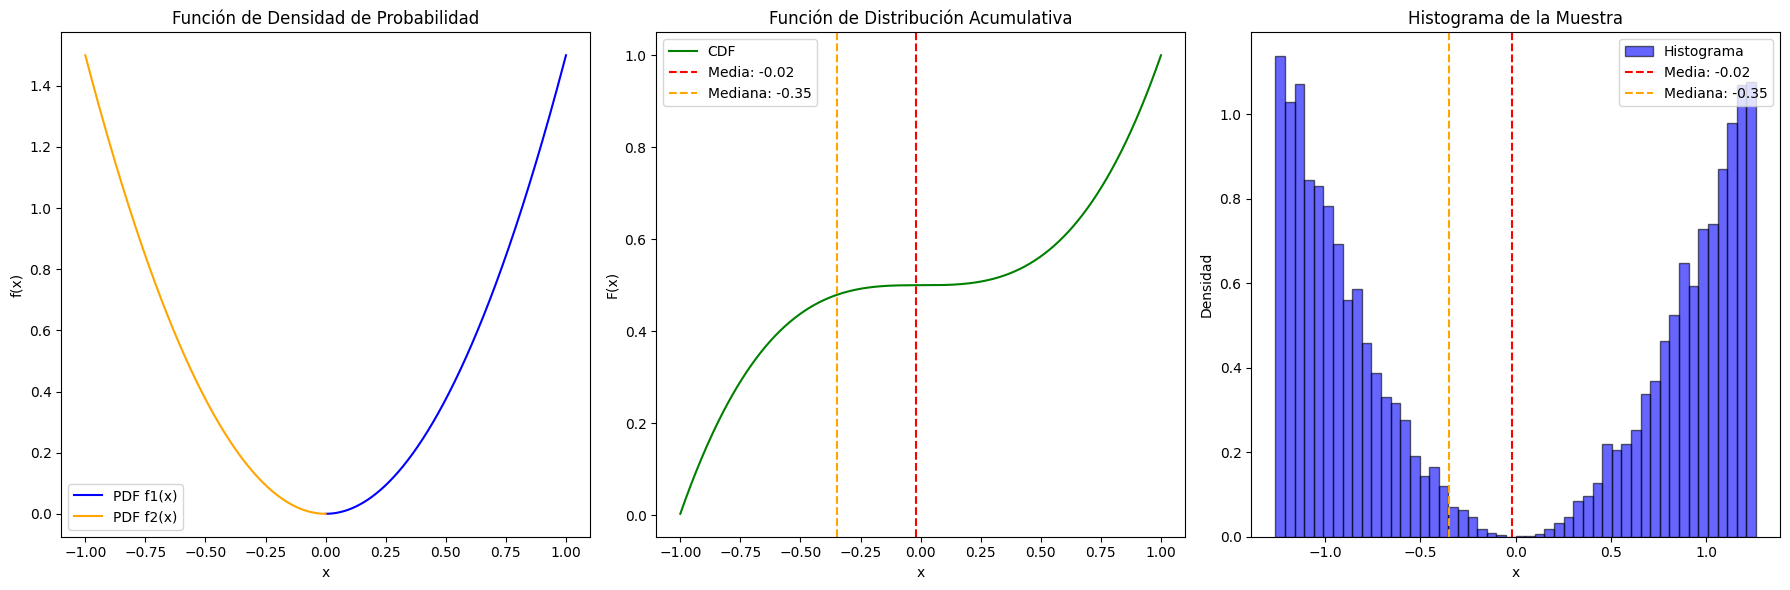

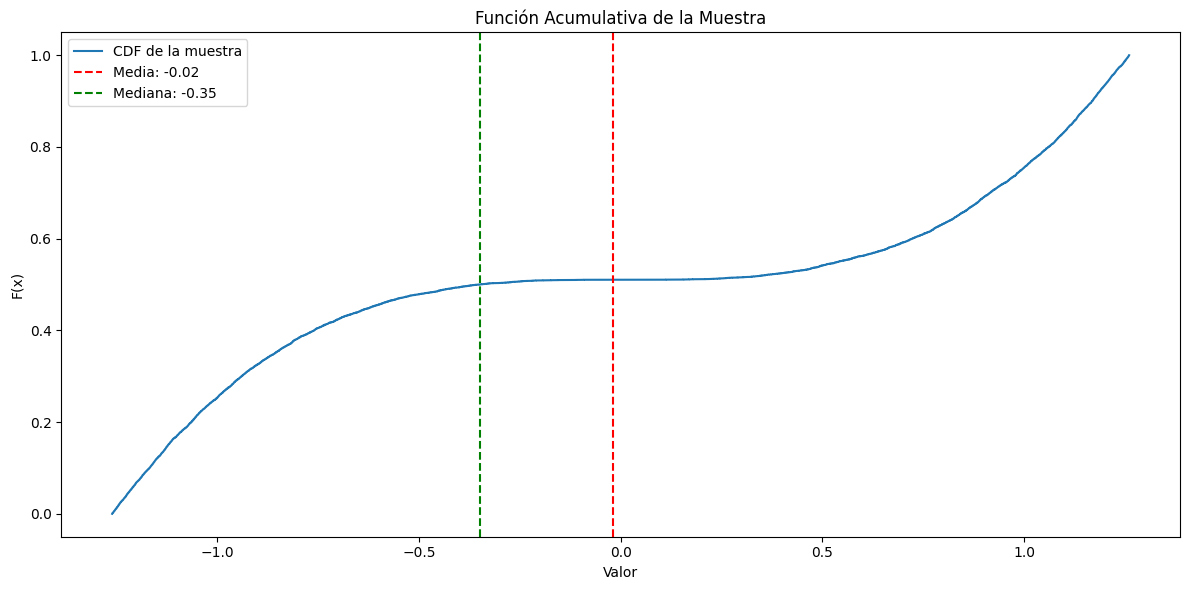

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de densidad de probabilidad para f1(x) y f2(x)
def f1(x):
    return 3 * (x ** 2) / 2 if 0 <= x <= 1 else 0

def f2(x):
    return 3 * (x ** 2) / 2 if -1 <= x < 0 else 0

# Generar la muestra usando el método de composición
def generar_muestra_composicion(n):
    muestras = []
    for _ in range(n):
        U = np.random.uniform(0, 1)
        V = np.random.uniform(0, 1)

        if V < 0.5:
            # Generar usando f1(x) en [0, 1]
            X = (2 * U) ** (1/3)
        else:
            # Generar usando f2(x) en [-1, 0]
            X = -((2 * U) ** (1/3))

        muestras.append(X)

    return muestras

# Calcular la CDF a partir de la PDF
def compute_cdf(pdf, x_values):
    cdf = np.cumsum(pdf)
    cdf = cdf / cdf[-1]  # Normalizar para que la última entrada sea 1
    return cdf

# Generar la muestra
n = 10000
muestra = generar_muestra_composicion(n)

# Calcular media y mediana de la muestra
mean_sample = np.mean(muestra)
median_sample = np.median(muestra)

# Crear valores de x para graficar las PDFs y CDFs
x_values_f1 = np.linspace(0, 1, 1000)
x_values_f2 = np.linspace(-1, 0, 1000)
pdf_values_f1 = [f1(x) for x in x_values_f1]
pdf_values_f2 = [f2(x) for x in x_values_f2]
x_values_cdf = np.linspace(-1, 1, 1000)
pdf_values_combined = [f1(x) + f2(x) for x in x_values_cdf]
cdf_values_combined = compute_cdf(pdf_values_combined, x_values_cdf)

# Graficar la PDF
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(x_values_f1, pdf_values_f1, label="PDF f1(x)", color="blue")
plt.plot(x_values_f2, pdf_values_f2, label="PDF f2(x)", color="orange")
plt.title("Función de Densidad de Probabilidad")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

# Graficar la CDF y añadir las líneas de media y mediana
plt.subplot(1, 3, 2)
plt.plot(x_values_cdf, cdf_values_combined, label="CDF", color="green")
plt.axvline(mean_sample, color='red', linestyle='--', label=f'Media: {mean_sample:.2f}')
plt.axvline(median_sample, color='orange', linestyle='--', label=f'Mediana: {median_sample:.2f}')
plt.title("Función de Distribución Acumulativa")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()

# Graficar el histograma de la muestra y añadir las líneas de media y mediana
plt.subplot(1, 3, 3)
plt.hist(muestra, bins=50, color="blue", edgecolor='black', density=True, alpha=0.6, label="Histograma")
plt.axvline(mean_sample, color='red', linestyle='--', label=f'Media: {mean_sample:.2f}')
plt.axvline(median_sample, color='orange', linestyle='--', label=f'Mediana: {median_sample:.2f}')
plt.title("Histograma de la Muestra")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()

# Ajustar el diseño y mostrar las gráficas
plt.tight_layout()
plt.show()

# Generar la función acumulativa de la muestra
def cdf(muestra):
    n = len(muestra)
    x = np.sort(muestra)
    y = np.arange(1, n+1) / n
    return x, y

X, Y = cdf(muestra)

# Graficar la función acumulativa de la muestra
plt.figure(figsize=(12, 6))
plt.step(X, Y, where='post', label='CDF de la muestra')
plt.axvline(mean_sample, color='red', linestyle='--', label=f'Media: {mean_sample:.2f}')
plt.axvline(median_sample, color='green', linestyle='--', label=f'Mediana: {median_sample:.2f}')
plt.title('Función Acumulativa de la Muestra')
plt.xlabel('Valor')
plt.ylabel('F(x)')
plt.legend()

# Ajustar el diseño y mostrar las gráficas
plt.tight_layout()
plt.show()

